In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [16]:
# Read in connectomes
train_connectome = pd.read_csv('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

# Read in one-hot encoded and imputated data 
train_survey = pd.read_csv('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/Preprocessing/train_cat_quant_imputed.csv')

# Read in Solutions 
solutions = pd.read_excel('/Users/rubyc/Desktop/Datathon/WIDS_Datathon2025_Team/Archive/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx')

In [17]:
# Merge 
train_merged = train_survey.merge(train_connectome, on='participant_id', how='left')
train_merged = train_merged.set_index('participant_id')

solutions = solutions.set_index('participant_id')


In [18]:
train_merged

,Barratt_Barratt_P1_Edu_college_edu,Barratt_Barratt_P1_Edu_graduate_edu,Barratt_Barratt_P1_Edu_high_school_grad,Barratt_Barratt_P1_Edu_junior_middle_school,Barratt_Barratt_P1_Edu_less_than_7th,Barratt_Barratt_P1_Edu_partial_college,Barratt_Barratt_P1_Edu_partial_high_school,Barratt_Barratt_P1_Edu_unknown,Barratt_Barratt_P1_Occ_0.0,Barratt_Barratt_P1_Occ_1.0,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
00fV0OyyoLfw,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
04X1eiS79T4B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
05ocQutkURd6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
06YUNBA9ZRLq,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwjJWCRzKhDz,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.157897,0.122978,0.112789,0.211312,0.601190,0.587116,0.312695,0.485938,0.189102,0.354333
zwXD5v17Rx01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.343204,0.198827,0.253990,0.198741,0.648260,0.055241,0.491985,0.118676,0.404331,0.537121
zWzLCi3NTBTd,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.110834,-0.002346,0.044653,0.234887,0.538475,0.024265,0.472322,0.095624,0.205326,0.182633


In [19]:
train_merged.isna().sum().sum()

0

In [20]:
solutions.head()

,ADHD_Outcome,Sex_F
participant_id,,
UmrK0vMLopoR,1,1
CPaeQkhcjg7d,1,0
Nb4EetVPm3gs,1,0
p4vPhVu91o4b,1,1
M09PXs7arQ5E,1,1


In [21]:
len(y)

1213

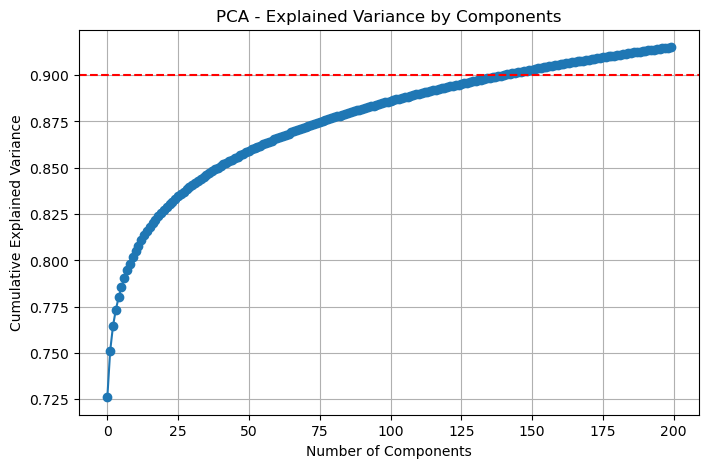

In [22]:
X = train_merged
y = solutions[['ADHD_Outcome']]
y = y["ADHD_Outcome"].values.ravel()

pca = PCA(n_components=200)

X_pca=pca.fit_transform(X)

# Step 2: Cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Step 3: Plot
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.show()

In [23]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components_90}")


Number of components to retain 90% variance: 141


In [24]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then apply PCA on X_train
pca = PCA(n_components=141)
X_train_pca = pca.fit_transform(X_train)

In [26]:
# Train LDA as classifier
lda = LDA()
lda.fit(X_train_pca, y_train)

# Transform X_test using the same PCA
X_test_pca = pca.transform(X_test)

# Predict
y_pred = lda.predict(X_test_pca)

# Accuracy
print("LDA Classifier Accuracy:", accuracy_score(y_test, y_pred))


LDA Classifier Accuracy: 0.6707818930041153


In [28]:
param_grid = [
    {'solver': ['svd']},  # No shrinkage allowed
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto']}
]

lda = LDA()
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Params: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best Accuracy: 0.622680412371134
